# Prerequisite Test

Kalp Shah, 24110152

kalp.shah@iitgn.ac.in

## Imports

In [5]:
import time
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import jax.numpy as jnp
from jax import grad
import sympy as sp
from sympy.utilities.lambdify import lambdify

## Question 1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

To multiply a matrix A of shape (n, k) with a matrix B of shape (k, m), you get a resulting matrix C of shape (n, m).

Each element of the result matrix C<sub>i,j</sub> is computed as:​
$$
C_{i,j} = \sum_{l=1}^{k} A_{i,l} \cdot B_{l,j}
$$
This involves: k multiplications for each element of C and (k – 1) additions to sum those products. The final number of multiplications will be n * m * k and the final number of additions will be n * m * (k - 1).

## Question 2
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
n, k, m = 300, 200, 250

def matrix_multiply_lists(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]

    return C

print("Creating test matrices...")
A_list = [[random.random() for _ in range(k)] for _ in range(n)]
B_list = [[random.random() for _ in range(m)] for _ in range(k)]

A_numpy = np.array(A_list)
B_numpy = np.array(B_list)

print(f"Matrix dimensions: A({n}×{k}) × B({k}×{m})")

print("\nTiming list-based multiplication...")
start_time = time.time()
C_list = matrix_multiply_lists(A_list, B_list)
list_time = time.time() - start_time
print(f"List-based multiplication time: {list_time:.4f} seconds")

print("\nTiming numpy multiplication...")
start_time = time.time()
C_numpy = np.dot(A_numpy, B_numpy)
numpy_time = time.time() - start_time
print(f"Numpy multiplication time: {numpy_time:.4f} seconds")

print(f"\nSpeed comparison:")
if numpy_time > 0:
    print(f"Numpy is {list_time/numpy_time:.1f}x faster than list-based approach")
else:
    print("Numpy execution was too fast to measure accurately")

Creating test matrices...
Matrix dimensions: A(300×200) × B(200×250)

Timing list-based multiplication...
List-based multiplication time: 2.5855 seconds

Timing numpy multiplication...
Numpy multiplication time: 0.0068 seconds

Speed comparison:
Numpy is 378.7x faster than list-based approach


Numpy is Much more Faster because:
1. Optimized C Implementations
2. Vectorized Operations
3. Bettor Memory Management
4. Uses Caching

## Question 3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the given method, the time complexity of finding the median of the Array is of the order: $$ O(n^2) $$ A Better Method would be to sort the Array and directly access the element at the index n/2. This Method would have a Time Complexity of $$ O(n * logn) $$

In [ ]:
arr = [random.randint(1, 1000) for _ in range(random.randint(1000, 10000))]

print(f"Array length: {len(arr)}")

# Method 1: O(n^2) approach - finding median by removing highest elements
def median_multiple_passes(arr):
    n = len(arr)
    if n % 2 == 1:
        temp_arr = arr.copy()
        for i in range((n + 1) // 2):
            if not temp_arr:
                return None
            max_val = max(temp_arr)
            temp_arr.remove(max_val)
        return max_val
    else:
        temp_arr1 = arr.copy()
        for i in range(n // 2):
            if not temp_arr1:
                return None
            max_val1 = max(temp_arr1)
            temp_arr1.remove(max_val1)
        val1 = max_val1
        temp_arr2 = arr.copy()
        for i in range(n // 2 + 1):
            if not temp_arr2:
                return None
            max_val2 = max(temp_arr2)
            temp_arr2.remove(max_val2)
        val2 = max_val2

        return (val1 + val2) / 2

# Method 2: Sorting approach O(n log n)
def median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

median1 = median_multiple_passes(arr)
median2 = median_sorting(arr)
median3 = np.median(arr)

print(f"Multiple passes median: {median1}")
print(f"Sorting median: {median2}")
print(f"NumPy median: {median3}")

print("\nTiming comparison:")
start = time.time()
median_multiple_passes(arr)
time1 = time.time() - start
start = time.time()
median_sorting(arr)
time2 = time.time() - start
start = time.time()
np.median(arr)
time3 = time.time() - start

print(f"Multiple passes: {time1:.4f}s")
print(f"Sorting: {time2:.4f}s")
print(f"NumPy: {time3:.4f}s")

Array length: 5648
Multiple passes median: 502.0
Sorting median: 502.0
NumPy median: 502.0

Timing comparison:
Multiple passes: 0.5327s
Sorting: 0.0010s
NumPy: 0.0006s


## Question 4
What is the gradient of the following function with respect to x and y?

$$x^2 y + y^3 \sin(x)$$

Let f denote the function given above
$$\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)$$

## Question 5 and 6
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
x_sym, y_sym = sp.symbols('x y')
f_sym = x_sym**2 * y_sym + y_sym**3 * sp.sin(x_sym)
df_dx_sym = sp.diff(f_sym, x_sym)
analytical_df_dx = lambdify((x_sym, y_sym), df_dx_sym, modules='numpy')

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

df_dx_jax = grad(f, argnums=0)
rng = np.random.default_rng(0)

for _ in range(5):
    x = float(rng.uniform(-5, 5))
    y = float(rng.uniform(-5, 5))
    jax_val = df_dx_jax(x, y)
    sympy_val = analytical_df_dx(x, y)
    print(f"x = {x:.3f}, y = {y:.3f} | JAX: {jax_val:.6f}, SymPy: {sympy_val:.6f}, Match: {np.allclose(jax_val, sympy_val)}")

x = 1.370, y = -2.302 | JAX: -8.744123, SymPy: -8.744123, Match: True
x = -4.590, y = -4.835 | JAX: 58.152237, SymPy: 58.152240, Match: True
x = 3.133, y = 4.128 | JAX: -44.456413, SymPy: -44.456412, Match: True
x = 1.066, y = 2.295 | JAX: 10.736485, SymPy: 10.736484, Match: True
x = 0.436, y = 4.351 | JAX: 78.436943, SymPy: 78.436941, Match: True


## Question 7
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
```
2022
  Branch 1
    Roll Number: 1, Name: N, Marks:
      Maths: 100, English: 70 …
  Branch 2
2023
  Branch 1
  Branch 2
2024
  Branch 1
  Branch 2
2025
  Branch 1
  Branch 2
```

In [ ]:
data = {
    "Year": {
        2024: {
            "Electrical Engineering": [{
                "Roll No": 24110152,
                "Name": "Kalp Pragneshkumar Shah",
                "Marks": {
                    "Maths": 100,
                    "English": 99,
                    "Physics": 98,
                    "Chemistry": 96
                }
            }],
            "Mechanical Engineering": [
                {
                    "Roll No": 24110167,
                    "Name": "Siya Abhay Kothari",
                    "Marks": {
                        "Maths": 99,
                        "English": 98,
                        "Physics": 97,
                        "Chemistry": 96
                    }
                },
                {
                    "Roll No": 24110046,
                    "Name": "Antara Vivek Donde",
                    "Marks": {
                        "Maths": 50,
                        "English": 50,
                        "Physics": 50,
                        "Chemistry": 50
                    }
                }
            ]
        },
        2023: {
            "Computer Science and Engineering": [
                {
                    "Roll No": 22110089,
                    "Name": "Guntas Singh Saran",
                    "Marks": {
                        "Maths": 100,
                        "English": 100,
                        "Physics": 100,
                        "Chemistry": 100
                    }
                }
            ]}
    }
}

## Question 8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [2]:
class Database:
    def __init__(self):
        self.yearData = []
    def addYear(self, year):
        self.yearData.append(year)
    def getData(self):
        return self.yearData

class Year:
    def __init__(self, year):
        self.year = year
        self.branchData = []
    def addBranch(self, branch):
        self.branchData.append(branch)
    def getData(self):
        return self.branchData

class Branch:
    def __init__(self, branchName):
        self.branchName = branchName
        self.studentData = []
    def addStudent(self, student):
        self.studentData.append(student)
    def getData(self):
        return self.studentData

class Student:
    def __init__(self, rollNo, marks):
        self.rollNo = rollNo
        self.marks = marks
    def getRollNo(self):
        return self.rollNo
    def getMarks(self):
        return self.marks
    def getData(self):
        return self.rollNo, self.marks

## Question 9

Using matplotlib, plot the following functions on the domain:  
x = 0.5 to 100.0 in steps of 0.5.

1. y = x  
2. y = x^2  
3. y = x^3 / 100  
4. y = sin(x)  
5. y = sin(x)/x  
6. y = log(x)  
7. y = e^x


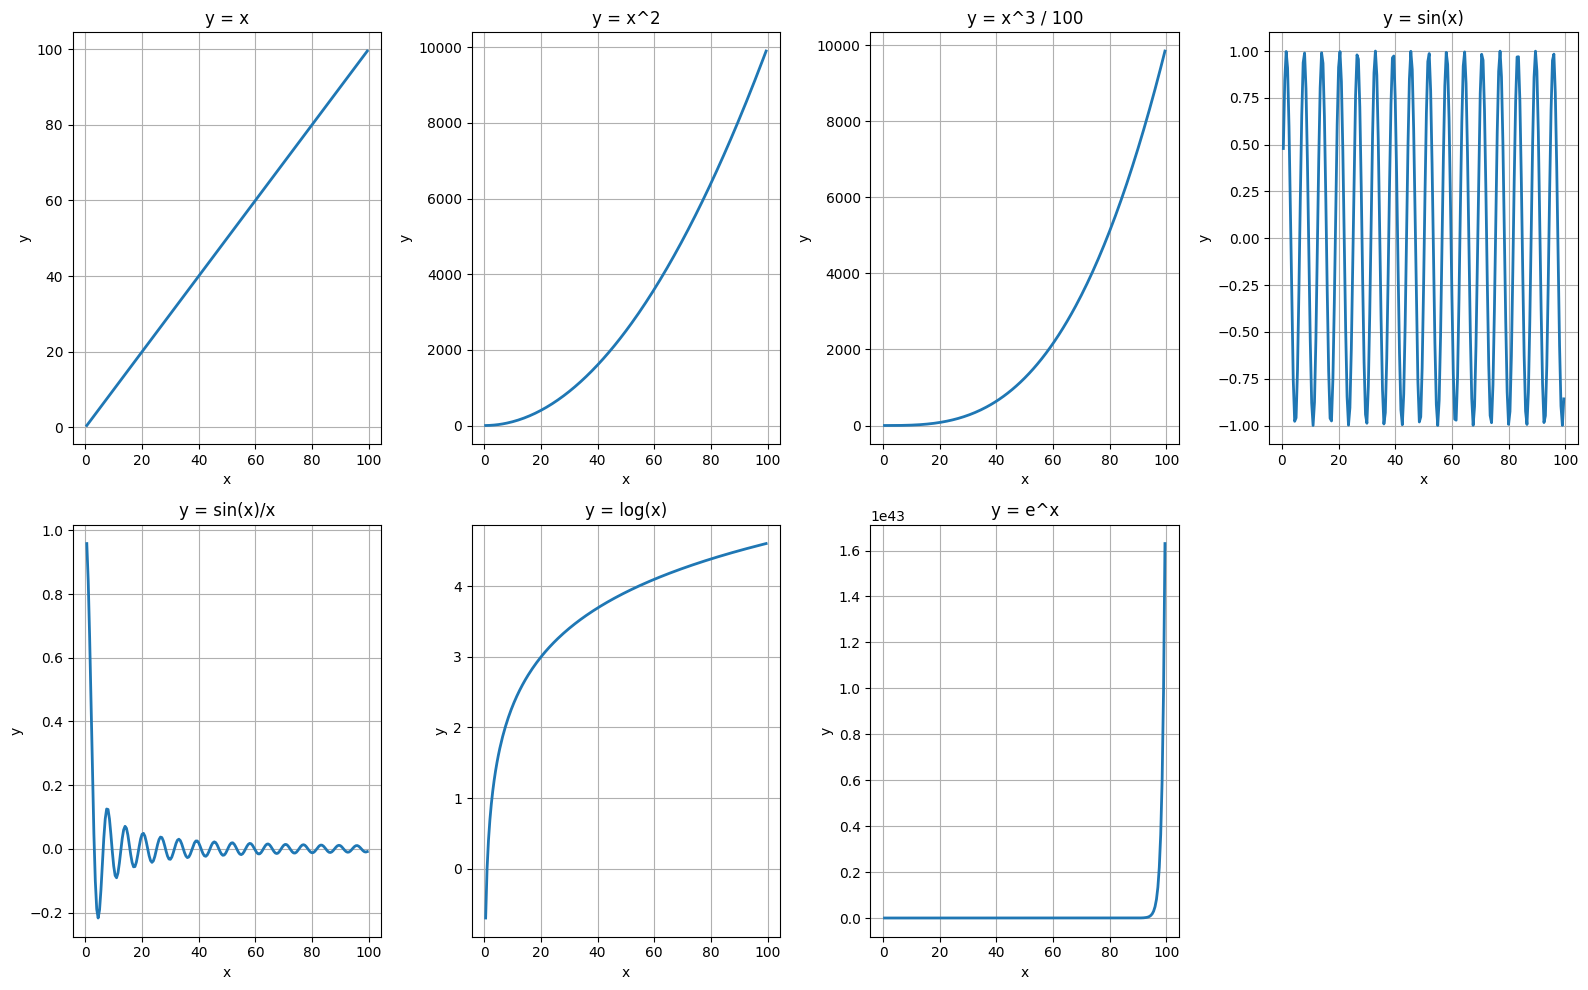

In [7]:
x = np.arange(0.5, 100, 0.5)

y1 = x
y2 = x ** 2
y3 = x ** 3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, axes = plt.subplots(2, 4, figsize=(16,10))

func = [
    (y1, 'y = x'),
    (y2, 'y = x^2'),
    (y3, 'y = x^3 / 100'),
    (y4, 'y = sin(x)'),
    (y5, 'y = sin(x)/x'),
    (y6, 'y = log(x)'),
    (y7, 'y = e^x')
]

for i, (y, label) in enumerate(func):
  row = i // 4
  col = i % 4
  axes[row, col].plot(x, y, linewidth=2)
  axes[row, col].set_title(label)
  axes[row, col].grid(True)
  axes[row, col].set_xlabel('x')
  axes[row, col].set_ylabel('y')

axes[1,3].axis('off')

plt.tight_layout()
plt.show()

## Question 10

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [18]:
matrix = torch.distributions.Uniform(1, 2).sample((20, 5)).numpy()
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

display(df.head())

columnStdDev = df.std()
maxColumnStdDev = columnStdDev.idxmax()

rowMean = df.mean(axis=1)
minRowMean = rowMean.idxmin()

print(f"Column with highest standard deviation: {maxColumnStdDev}")
print(f"Row with lowest mean: {minRowMean}")

,a,b,c,d,e
0,1.638173,1.795034,1.145265,1.229310,1.423163
1,1.349449,1.483996,1.928177,1.461056,1.945987
2,1.310449,1.920577,1.472286,1.745045,1.704954
3,1.268041,1.145484,1.853906,1.461655,1.237534
4,1.013472,1.477690,1.904827,1.044468,1.067881


Column with highest standard deviation: e
Row with lowest mean: 11


## Question 11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [19]:
df["f"] = df.sum(axis=1)
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

print(f"Number of rows where g is LT8: {len(df[df['g'] == 'LT8'])}")

display(df.head())

Number of rows where g is LT8: 13


,a,b,c,d,e,f,g
0,1.638173,1.795034,1.145265,1.229310,1.423163,7.230944,LT8
1,1.349449,1.483996,1.928177,1.461056,1.945987,8.168665,GT8
2,1.310449,1.920577,1.472286,1.745045,1.704954,8.153311,GT8
3,1.268041,1.145484,1.853906,1.461655,1.237534,6.966620,LT8
4,1.013472,1.477690,1.904827,1.044468,1.067881,6.508338,LT8


## Question 12

Write a small piece of code to explain broadcasting in numpy.

Broadcasting allows us to perform arithmetic operations on numpy arrays without reshaping it. It automatically adjusts the smaller array to match the larger array's shape by replicating its values along the necessary dimensions.

In [23]:
arr1 = np.array([[1, 2, 3, 4, 5]])
arr2 = np.array([[1], [2], [3], [4]])

res = arr1 + arr2

print("Array 1:")
display(arr1)
print("\n")
print("Array 2:")
display(arr2)
print("\n")
print("Addition Result:")
display(res)
print("\n")

print(f"Array 1 Shape: {arr1.shape}")
print(f"Array 2 Shape: {arr2.shape}")
print(f"Addition Result Shape: {res.shape}")

Array 1:


array([[1, 2, 3, 4, 5]])



Array 2:


array([[1],
       [2],
       [3],
       [4]])



Addition Result:


array([[2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])



Array 1 Shape: (1, 5)
Array 2 Shape: (4, 1)
Addition Result Shape: (4, 5)


## Question 13
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [24]:
def customArgmin(arr):
  n = len(arr)
  if(n == 0):
    return -1

  minIndex = 0
  minValue = arr[0]
  for i in range(1, n):
    if arr[i] < minValue:
      minValue = arr[i]
      minIndex = i
  return minIndex

arr = np.array([4, 2, 7, 1, 3])
print(f"Custom Argmin Function Value: {customArgmin(arr)}")
print(f"Numpy Argmin Function Value: {np.argmin(arr)}")

Custom Argmin Function Value: 3
Numpy Argmin Function Value: 3
